# Introduction

In this notebook, we implement [YOLOv4](https://arxiv.org/pdf/2004.10934.pdf) for training on your own dataset in PyTorch.

We also recommend reading our blog post on [Training YOLOv4 on custom data](https://blog.roboflow.ai/training-yolov4-on-a-custom-dataset/) side by side.

We will take the following steps to implement YOLOv4 on our custom data:
* Set up YOLOv4 environment
* Download Custom Dataset via Roboflow
* Train Custom YOLOv4 detector
* Reload Custom YOLOv4 detector weights for inference

When you are done you will have a custom detector that you can use. It will make inference like this:

#### ![Chesse Image](https://i.imgur.com/cGOxffX.png)

### **Reach out for support**

If you run into any hurdles on your own data set or just want to share some cool results in your own domain, [reach out!](https://roboflow.ai/contact) 


#### ![Roboflow Workmark](https://i.imgur.com/WHFqYSJ.png)

# Set up YOLOv4 Environment

In [ ]:
!git clone https://github.com/roboflow-ai/pytorch-YOLOv4.git

Cloning into 'pytorch-YOLOv4'...
remote: Enumerating objects: 398, done.
remote: Total 398 (delta 0), reused 0 (delta 0), pack-reused 398
Receiving objects: 100% (398/398), 926.53 KiB | 3.11 MiB/s, done.
Resolving deltas: 100% (225/225), done.


In [ ]:
%cd /content/pytorch-YOLOv4
!pip install -r requirements.txt
# This restarts the runtime--ignore any error messages
import os
os.kill(os.getpid(), 9)

/content/pytorch-YOLOv4


In [ ]:
# download yolov4 weights that have already been converted to PyTorch
%cd /content/pytorch-YOLOv4/cfg/
!gdown https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA

/content/pytorch-YOLOv4/cfg
Downloading...
From: https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA
To: /content/pytorch-YOLOv4/cfg/yolov4.conv.137.pth
170MB [00:01, 122MB/s]


# Download Custom Dataset

## Export Your Dataset from Roboflow

Roboflow enables you to export your dataset in any format you need - including for this notebook.

Create a [free account](https://app.roboflow.ai). Upload your private dataset. Generate a version (applying any preprocessing and augmentations you desire). Create an export. Select **YOLOv4 PyTorch** as the export format. Click **"Show Download code"**, copy your link, and paste it in the next cell. Magic.

In [ ]:
%cd /content/
# REPLACE this link with your Roboflow dataset (export as YOLOv4 PyTorch format)
!curl -L "done" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1121      0 --:--:-- --:--:-- --:--:--  1121
100 5777k  100 5777k    0     0  1562k      0  0:00:03  0:00:03 --:--:-- 2145k
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/_annotations.txt   
 extracting: test/_classes.txt       
 extracting: test/img_CO_01_ok_0311_1_015_050_png.rf.06b4b468dcdae9688e75669031ffc855.jpg  
 extracting: test/img_CO_01_ok_0317_1_015_325_png.rf.a713b5fcf3d721ce341ba34e09a4c6cb.jpg  
 extracting: test/img_CO_01_ok_0356_1_016_970_png.rf.229a8ba1276b25df577a4f4e068b32c1.jpg  
 extracting: test/img_CO_01_ok_0371_1_017_640_png.rf.e89ad7b60c7e1dc0c502a58e4f7423e9.jpg  
 extracting: test/img_CO_01_ok_0376_1_017_850_png.rf.aa0f1e204f1f132bb47953d8edbcbd58.jpg  
 extracting: test/img_CO_01_ok_0378_1_017_930_png.rf.fb8ddb

In [ ]:
%cp train/_annotations.txt train/train.txt
%cp train/_annotations.txt train.txt
%mkdir data
%cp valid/_annotations.txt data/val.txt
%cp valid/*.jpg train/

In [ ]:
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('train/_classes.txt')

In [8]:
print(num_classes)

2


# Train Custom Detector

In [9]:
#start training
#-b batch size (you should keep this low (2-4) for training to work properly)
#-s number of subdivisions in the batch, this was more relevant for the darknet framework
#-l learning rate
#-g direct training to the GPU device
#pretrained invoke the pretrained weights that we downloaded above
#classes - number of classes
#dir - where the training data is
#epoch - how long to train for
!python ./pytorch-YOLOv4/train.py -b 2 -s 1 -l 0.001 -g 0 -pretrained /content/pytorch-YOLOv4/cfg/yolov4.conv.137.pth -classes {num_classes} -dir ./train -epochs 50

log file path:log/log_2021-07-12_09-11-43.txt
2021-07-12 09:11:43,645 train.py[line:435] INFO: Using device cuda
2021-07-12 09:11:46,166 train.py[line:282] INFO: Starting training:
        Epochs:          50
        Batch size:      2
        Subdivisions:    1
        Learning rate:   0.001
        Training size:   399
        Validation size: 38
        Checkpoints:     True
        Device:          cuda
        Images size:     608
        Optimizer:       adam
        Dataset classes: 2
        Train label path:train.txt
        Pretrained:
    
Epoch 1/50:   0%|        | 0/399 [00:00<?, ?img/s]/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Epoch 1/50:  10%| | 38/399 [00:19<02:34,  2.34img//usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, 

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Trained Weights for Custom Detection

You can also use this to load previously saved weights!

In [11]:
#looking at the weights that our model has saved during training
!ls checkpoints

Yolov4_epoch10.pth  Yolov4_epoch22.pth	Yolov4_epoch34.pth  Yolov4_epoch46.pth
Yolov4_epoch11.pth  Yolov4_epoch23.pth	Yolov4_epoch35.pth  Yolov4_epoch47.pth
Yolov4_epoch12.pth  Yolov4_epoch24.pth	Yolov4_epoch36.pth  Yolov4_epoch48.pth
Yolov4_epoch13.pth  Yolov4_epoch25.pth	Yolov4_epoch37.pth  Yolov4_epoch49.pth
Yolov4_epoch14.pth  Yolov4_epoch26.pth	Yolov4_epoch38.pth  Yolov4_epoch4.pth
Yolov4_epoch15.pth  Yolov4_epoch27.pth	Yolov4_epoch39.pth  Yolov4_epoch50.pth
Yolov4_epoch16.pth  Yolov4_epoch28.pth	Yolov4_epoch3.pth   Yolov4_epoch5.pth
Yolov4_epoch17.pth  Yolov4_epoch29.pth	Yolov4_epoch40.pth  Yolov4_epoch6.pth
Yolov4_epoch18.pth  Yolov4_epoch2.pth	Yolov4_epoch41.pth  Yolov4_epoch7.pth
Yolov4_epoch19.pth  Yolov4_epoch30.pth	Yolov4_epoch42.pth  Yolov4_epoch8.pth
Yolov4_epoch1.pth   Yolov4_epoch31.pth	Yolov4_epoch43.pth  Yolov4_epoch9.pth
Yolov4_epoch20.pth  Yolov4_epoch32.pth	Yolov4_epoch44.pth
Yolov4_epoch21.pth  Yolov4_epoch33.pth	Yolov4_epoch45.pth


In [63]:
#choose random test image
import os
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);

In [64]:
%%time
##change the epoch here to the one you would like to use for inference
!python /content/pytorch-YOLOv4/models.py {num_classes} checkpoints/Yolov4_epoch46.pth {img_path} test/_classes.txt

palm: 0.995121
save plot results to predictions.jpg
CPU times: user 36.7 ms, sys: 18.6 ms, total: 55.2 ms
Wall time: 4.15 s


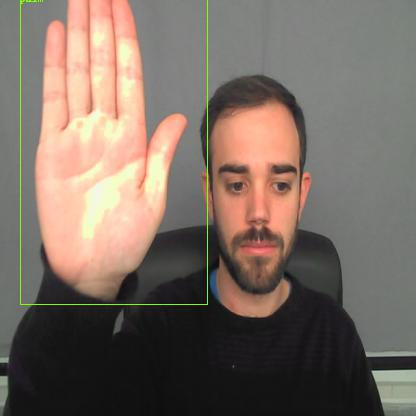

In [65]:
#visualize inference
from IPython.display import Image
Image('predictions.jpg')